In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("gdax-trading-volume-1-year.csv")

In [3]:
df

,snapped_at,volume
0,2024-09-25 10:30:00 +0000,1.843681e+09
1,2024-09-26 10:30:00 +0000,1.490229e+09
2,2024-09-27 10:30:00 +0000,2.621829e+09
3,2024-09-28 10:30:00 +0000,2.052360e+09
4,2024-09-29 10:30:00 +0000,8.589400e+08
...,...,...
360,2025-09-20 10:30:00 +0000,2.170311e+09
361,2025-09-21 10:30:00 +0000,1.732877e+09
362,2025-09-22 10:30:00 +0000,3.363763e+09
363,2025-09-23 10:30:00 +0000,3.331788e+09


In [26]:
import pandas as pd

# Assuming your data is in a DataFrame called df
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['quarter'] = df['snapped_at'].dt.to_period('Q')

# Aggregate volume by quarter
quarterly_volume = df.groupby('quarter')['volume'].sum().reset_index()

# Optional: Rename columns for clarity
quarterly_volume.columns = ['Quarter', 'Total Volume']

print(quarterly_volume)


  Quarter  Total Volume
0  2024Q3  1.034274e+10
1  2024Q4  4.234482e+11
2  2025Q1  3.786961e+11
3  2025Q2  2.287097e+11
4  2025Q3  2.676195e+11


/var/folders/tb/zk15pcq16yng7wq853lq67ph0000gn/T/ipykernel_27473/2739177550.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = df['snapped_at'].dt.to_period('Q')


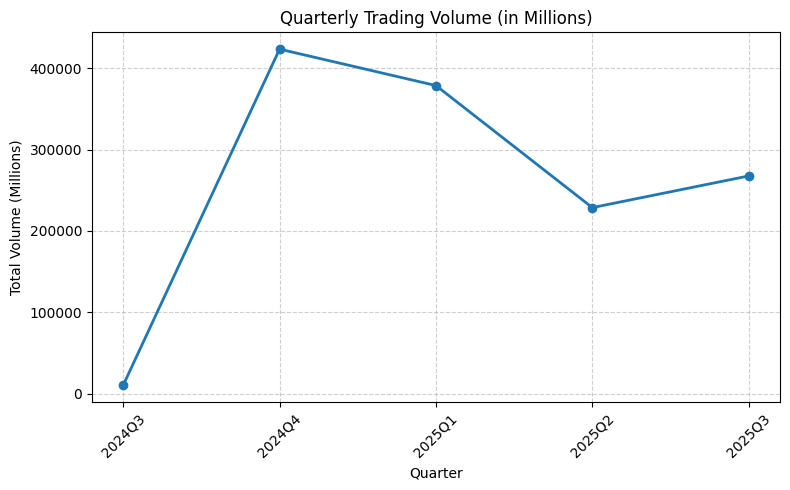

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your df is already loaded as quarterly_volume
# Step 1: Refactor 'Total Volume' to millions
quarterly_volume["Total Volume (M)"] = quarterly_volume["Total Volume"] / 1_000_000

# Step 2: Plot quarter by quarter volume
plt.figure(figsize=(8, 5))
plt.plot(quarterly_volume["Quarter"].astype(str), quarterly_volume["Total Volume (M)"], marker="o", linestyle="-", linewidth=2)

plt.title("Quarterly Trading Volume (in Millions)")
plt.xlabel("Quarter")
plt.ylabel("Total Volume (Millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
quarterly_volume

,Quarter,Total Volume,Total Volume (M)
0,2024Q3,1.034274e+10,10342.743008
1,2024Q4,4.234482e+11,423448.205998
2,2025Q1,3.786961e+11,378696.058366
3,2025Q2,2.287097e+11,228709.724615
4,2025Q3,2.676195e+11,267619.545842


In [16]:
(quarterly_volume.iloc[4,2] - quarterly_volume.iloc[3,2]) / quarterly_volume.iloc[3,2]

0.1701275330213097

In [7]:
import pandas as pd

data = {
    "Quarter": ["Q2'24", "Q3'24", "Q4'24", "Q1'25", "Q2'25"],
    "Consumer": [37, 34, 94, 78, 43],
    "Institutional": [189, 151, 345, 315, 194]
}

# Create DataFrame
test = pd.DataFrame(data)

# Add Total column
test["Total"] = test["Consumer"] + test["Institutional"]

print(test)

  Quarter  Consumer  Institutional  Total
0   Q2'24        37            189    226
1   Q3'24        34            151    185
2   Q4'24        94            345    439
3   Q1'25        78            315    393
4   Q2'25        43            194    237


In [8]:
import pandas as pd

data = {
    "Quarter": ["Q2'24", "Q3'24", "Q4'24", "Q1'25", "Q2'25"],
    "Consumer": [37, 34, 94, 78, 43],
    "Institutional": [189, 151, 345, 315, 194]
}

# Create DataFrame
test = pd.DataFrame(data)

# Add Total column
test["Total"] = test["Consumer"] + test["Institutional"]

print(test)

  Quarter  Consumer  Institutional  Total
0   Q2'24        37            189    226
1   Q3'24        34            151    185
2   Q4'24        94            345    439
3   Q1'25        78            315    393
4   Q2'25        43            194    237


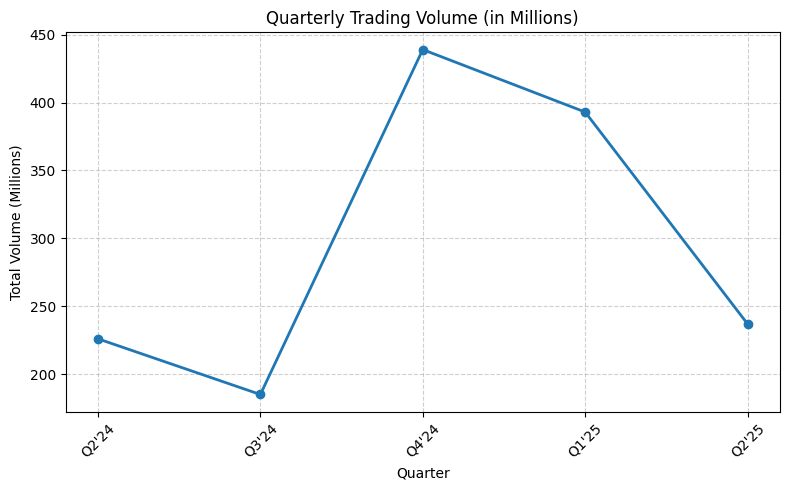

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Plot quarter by quarter volume
plt.figure(figsize=(8, 5))
plt.plot(test["Quarter"].astype(str), test["Total"], marker="o", linestyle="-", linewidth=2)

plt.title("Quarterly Trading Volume (in Millions)")
plt.xlabel("Quarter")
plt.ylabel("Total Volume (Millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


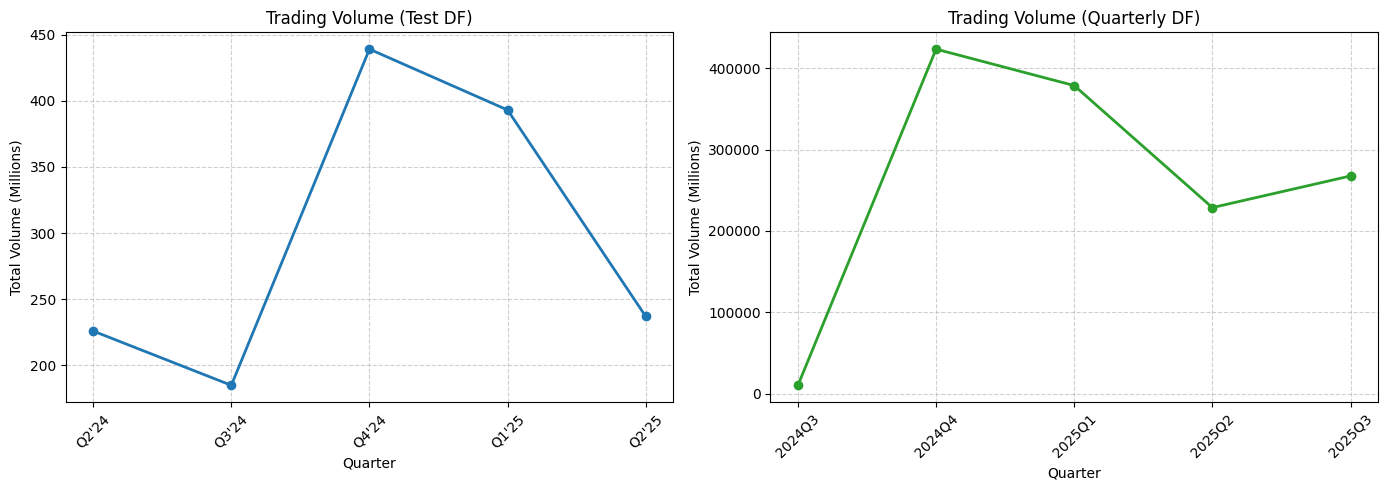

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create figure with 1 row, 2 columns (no shared y axis)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- First plot: test df ---
axes[0].plot(
    test["Quarter"].astype(str),
    test["Total"],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:blue"
)
axes[0].set_title("Trading Volume (Test DF)")
axes[0].set_xlabel("Quarter")
axes[0].set_ylabel("Total Volume (Millions)")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].tick_params(axis="x", rotation=45)

# --- Second plot: quarterly_volume df ---
axes[1].plot(
    quarterly_volume["Quarter"].astype(str),
    quarterly_volume["Total Volume (M)"],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:green"
)
axes[1].set_title("Trading Volume (Quarterly DF)")
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Total Volume (Millions)")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
test["Consumer_PCT_Total"] = test["Consumer"] / test["Total"]
test["Institutional_PCT_Total"] = test["Institutional"] / test["Total"]

In [36]:
import pandas as pd

# Build the transaction revenue data
revenue = {
    "Quarter": ["Q2'24", "Q3'24", "Q4'24", "Q1'25", "Q2'25"],
    "Consumer": [664.8, 483.3, 1347.1, 1095.5, 649.9],
    "Institutional": [63.6, 55.3, 141.3, 98.9, 60.8],
    "Total": [780.9, 572.5, 1556.0, 1262.2, 764.3]
}

# Create DataFrame
trans = pd.DataFrame(revenue)

# Set quarter as index (optional)
trans.set_index("Quarter", inplace=True)

print(trans)


         Consumer  Institutional   Total
Quarter                                 
Q2'24       664.8           63.6   780.9
Q3'24       483.3           55.3   572.5
Q4'24      1347.1          141.3  1556.0
Q1'25      1095.5           98.9  1262.2
Q2'25       649.9           60.8   764.3


In [37]:
trans["Consumer_PCT_Total"] = trans["Consumer"] / trans["Total"]
trans["Institutional_PCT_Total"] = trans["Institutional"] / trans["Total"]

In [38]:
trans

,Consumer,Institutional,Total,Consumer_PCT_Total,Institutional_PCT_Total
Quarter,,,,,
Q2'24,664.8,63.6,780.9,0.851325,0.081444
Q3'24,483.3,55.3,572.5,0.844192,0.096594
Q4'24,1347.1,141.3,1556.0,0.865746,0.090810
Q1'25,1095.5,98.9,1262.2,0.867929,0.078355
Q2'25,649.9,60.8,764.3,0.850321,0.079550


In [41]:
test = trans

KeyError: 'Quarter'

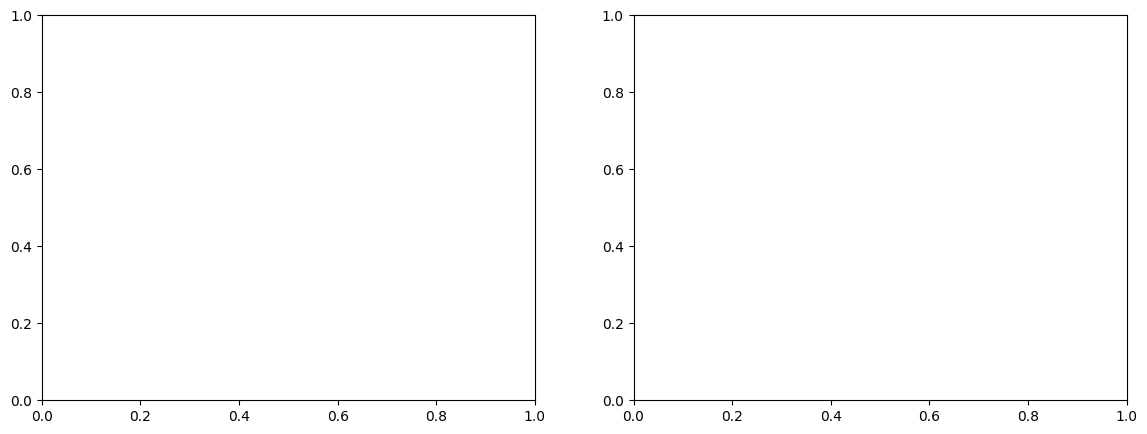

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' and 'quarterly_volume' DataFrames are already loaded
# Convert 'Total Volume' to millions
quarterly_volume["Total Volume (M)"] = quarterly_volume["Total Volume"] / 1_000_000

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=False)

# Plot Institutional_PCT_Total
axes[0].plot(test["Quarter"].astype(str), test["Institutional_PCT_Total"], marker="o", linestyle="-", linewidth=2)
axes[0].set_title("Institutional % of Total Volume")
axes[0].set_xlabel("Quarter")
axes[0].set_ylabel("Institutional")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot Total Volume (M)
axes[1].plot(quarterly_volume["Quarter"].astype(str), quarterly_volume["Total Volume (M)"], marker="o", linestyle="-", linewidth=2)
axes[1].set_title("Quarterly Trading Volume (in Millions)")
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Total Volume (Millions)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [17]:
test

,Quarter,Consumer,Institutional,Total
0,Q2'24,37,189,226
1,Q3'24,34,151,185
2,Q4'24,94,345,439
3,Q1'25,78,315,393
4,Q2'25,43,194,237


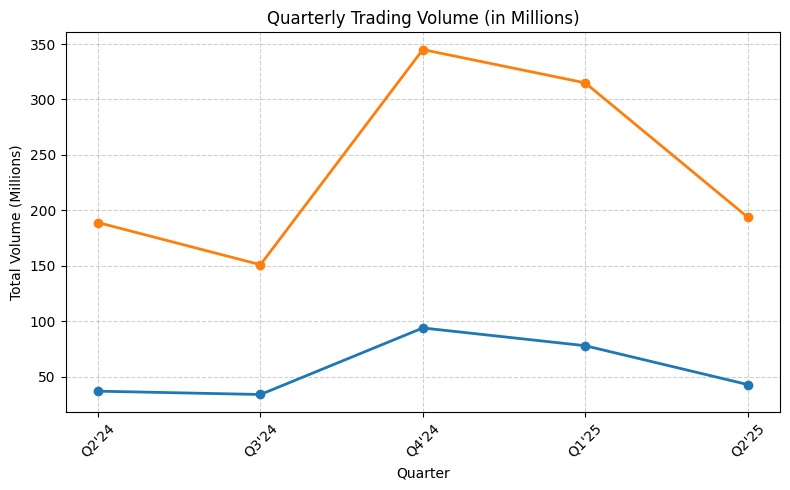

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Plot quarter by quarter volume
plt.figure(figsize=(8, 5))
plt.plot(test["Quarter"].astype(str), test["Consumer"], marker="o", linestyle="-", linewidth=2)
plt.plot(test["Quarter"].astype(str), test["Institutional"], marker="o", linestyle="-", linewidth=2)


plt.title("Quarterly Trading Volume (in Millions)")
plt.xlabel("Quarter")
plt.ylabel("Total Volume (Millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [12]:
market = pd.read_csv("USDC_1Y_graph_coinmarketcap.csv")

In [13]:
market

,name;open;high;low;close;volume;marketCap;timestamp
0,2781;0.9999130206;1.0011374593;0.999486584;0.9...
1,2781;0.9997952458;1.0009908525;0.9985773444;0....
2,2781;0.9998950603;1.0012391443;0.9993669618;0....
3,2781;0.999890877;1.0009926611;0.9990282253;0.9...
4,2781;0.9999750955;1.0012181335;0.998762017;0.9...
5,2781;1.0000480486;1.0006902353;0.9981879116;1....
6,2781;1.0000587621;1.0008086746;0.9987812255;0....
7,2781;1.0000234865;1.001118388;0.9985775356;0.9...
8,2781;1.0000143345;1.0010205143;0.9981668461;1....
9,2781;1.0000106756;1.0015745977;0.9987246079;0....


In [15]:
import pandas as pd

# Assuming your DataFrame looks like this:
# market = pd.DataFrame({'data': ['AAPL;170.5;172.3;169.8;171.2;1000000;2500000000;2023-10-03', ...]})

# Step 1: Split the 'data' column into multiple columns
market_expanded = market['name;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)

# Step 2: Rename the columns
market_expanded.columns = ['name', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']

# Step 3: Convert to appropriate data types (optional but recommended)
market_expanded['open'] = market_expanded['open'].astype(float)
market_expanded['high'] = market_expanded['high'].astype(float)
market_expanded['low'] = market_expanded['low'].astype(float)
market_expanded['close'] = market_expanded['close'].astype(float)
market_expanded['volume'] = market_expanded['volume'].astype(float)
market_expanded['marketCap'] = market_expanded['marketCap'].astype(float)
market_expanded['timestamp'] = pd.to_datetime(
    market_expanded['timestamp'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'  # This will turn unparseable entries into NaT
)




# Step 4: Replace the original DataFrame if needed
market = market_expanded



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       52 non-null     object        
 1   open       52 non-null     float64       
 2   high       52 non-null     float64       
 3   low        52 non-null     float64       
 4   close      52 non-null     float64       
 5   volume     52 non-null     float64       
 6   marketCap  52 non-null     float64       
 7   timestamp  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.4+ KB


In [20]:
transaction = pd.read_excel("transactoin.xlsx")
transaction

,Unnamed: 0,Q1_2023,Q2_2023,Q3_2023,Q4_2023,Q1_2024,Q2_2024,Q3_2024,Q4_2024,Q1_2025,Q2_2025,Q3_2025
0,Consumer,329.2,289.0,247.0,468.9,935.2,664.8,483.3,1347.1,1095.5,648.9,NaN
1,Insitutional,22.3,17.1,14.1,36.7,85.4,63.6,55.3,141.3,98.9,60.8,NaN
2,Other,23.3,21.1,27.5,23.6,56.1,52.5,34.0,67.6,67.8,53.5,NaN
3,Total,374.8,327.2,288.6,529.2,1076.7,780.9,572.6,1556.0,1262.2,763.2,NaN


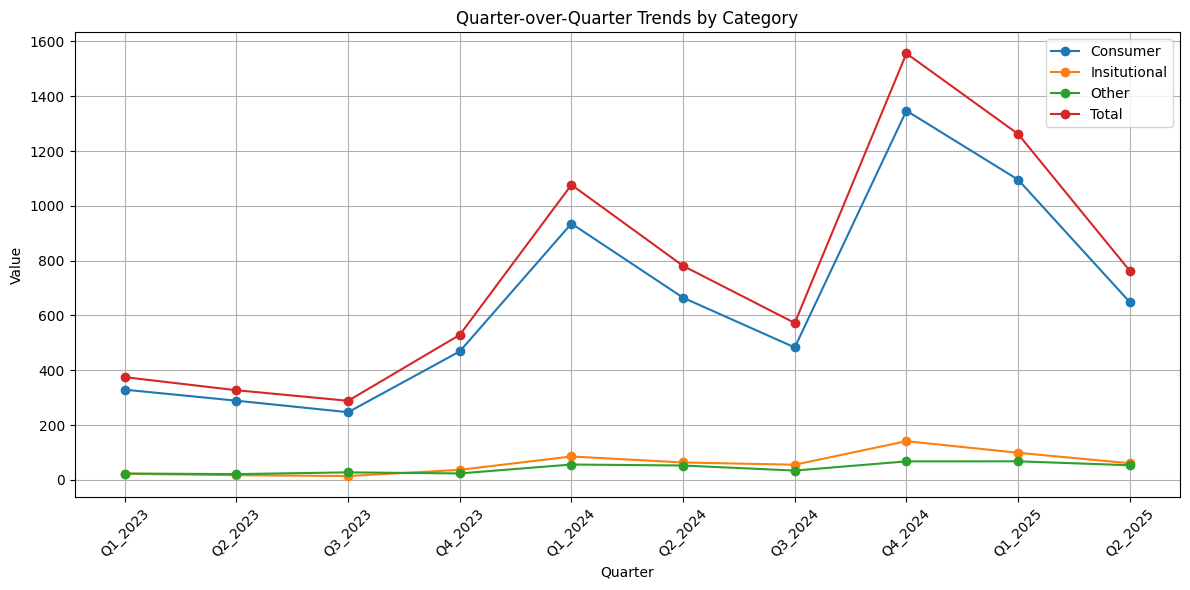

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("transactoin.xlsx")

# Set 'Unnamed: 0' as the index to use category names as row labels
df.set_index('Unnamed: 0', inplace=True)

# Transpose the DataFrame so quarters become the index
df_t = df.T

# Plotting
plt.figure(figsize=(12, 6))
for category in df_t.columns:
    plt.plot(df_t.index, df_t[category], marker='o', label=category)

plt.title('Quarter-over-Quarter Trends by Category')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Plot quarter by quarter volume
plt.figure(figsize=(8, 5))
plt.plot(test["Quarter"].astype(str), test["Consumer"], marker="o", linestyle="-", linewidth=2)
plt.plot(test["Quarter"].astype(str), test["Institutional"], marker="o", linestyle="-", linewidth=2)


plt.title("Quarterly Trading Volume (in Millions)")
plt.xlabel("Quarter")
plt.ylabel("Total Volume (Millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'test' is not defined

<Figure size 800x500 with 0 Axes>

In [32]:
df

,snapped_at,volume
0,2024-09-25 10:30:00 +0000,1.843681e+09
1,2024-09-26 10:30:00 +0000,1.490229e+09
2,2024-09-27 10:30:00 +0000,2.621829e+09
3,2024-09-28 10:30:00 +0000,2.052360e+09
4,2024-09-29 10:30:00 +0000,8.589400e+08
...,...,...
360,2025-09-20 10:30:00 +0000,2.170311e+09
361,2025-09-21 10:30:00 +0000,1.732877e+09
362,2025-09-22 10:30:00 +0000,3.363763e+09
363,2025-09-23 10:30:00 +0000,3.331788e+09


In [43]:
df

,snapped_at,volume
0,2024-09-25 10:30:00 +0000,1.843681e+09
1,2024-09-26 10:30:00 +0000,1.490229e+09
2,2024-09-27 10:30:00 +0000,2.621829e+09
3,2024-09-28 10:30:00 +0000,2.052360e+09
4,2024-09-29 10:30:00 +0000,8.589400e+08
...,...,...
360,2025-09-20 10:30:00 +0000,2.170311e+09
361,2025-09-21 10:30:00 +0000,1.732877e+09
362,2025-09-22 10:30:00 +0000,3.363763e+09
363,2025-09-23 10:30:00 +0000,3.331788e+09
